# TASK1: Prediction using Supervised ML

## NAME: Nandini Dey


This is a simple linear regression task as it involves just 2 variables.

## Problem Statement
### What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
# IMPORTING ALL THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

%matplotlib inline

## READING THE DATA

In [5]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data import success")

Data import success


In [6]:
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


## UNDERSTANDING THE DATASET

#### Check the number of rows and columns of the DataFrame

In [7]:
df.shape

(25, 2)

#### We count the number of values in each column

In [8]:
df.count()

Hours     25
Scores    25
dtype: int64

#### Finding the mean of the each column

In [9]:
df.mean()

Hours      5.012
Scores    51.480
dtype: float64

#### Finding the maximum of each column

In [10]:
df.max()

Hours      9.2
Scores    95.0
dtype: float64

#### Finding the minimum of each column

In [11]:
df.min()

Hours      1.1
Scores    17.0
dtype: float64

#### We print a concise summary of a DataFrame

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Check if there are any NULL values

In [13]:
df.isnull == True

False

#### Now let us plot our data points on 2-D graph to look at our dataset and see if we can manually find any relationship between the data.

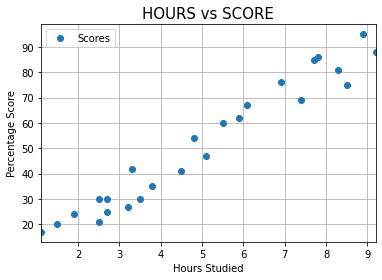

In [14]:
df.plot(x='Hours',y='Scores',grid=True,style='o')
plt.title(label= 'HOURS vs SCORE',loc='center',size=15)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

# PREPARING THE DATA

#### The next step is to divide the data into attributes and labels.

In [15]:
X = df.iloc[:, :-1].values #separates the hours column
y = df.iloc[:,1].values #separates the scores column


#### The next step is to split this data into training and test sets using Scikit-Learn's built-in train_test_split() method

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# TRAINING THE MODEL

#### We have the data splitted into the train and test sets. Now we train our algorithm.

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 
reg.fit(X_train,y_train) #Fit a straight line Y=b0+b1x

print('TRAINING SUCCESSFUL')

TRAINING SUCCESSFUL


#### Plotting the regressor line

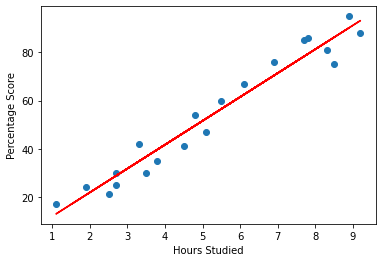

In [18]:
line = reg.coef_*X + reg.intercept_ #.intercept_ is a scalar, while .coef_ is an array
plt.scatter(X_train,y_train)
plt.plot(X, line,color="red")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### From the above graph we can say that there is Positive Linear Relationship between the Number of Hours studied and Percentage Scored

# PREDICTIONS

#### The datasets have been trained. Now we try to predict the values using the test dataset.

In [19]:
# Testing data - In Hours
print(X_test)
# Predicting the scores
y_pred = reg.predict(X_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#### Comparing the predicted score and actual score

In [20]:
compare = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
compare

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Visualize the predicted and actual scores

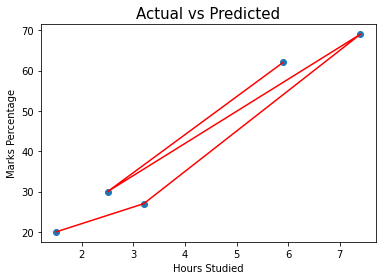

In [21]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_test, color='red')
plt.title('Actual vs Predicted', size=15)
plt.ylabel('Marks Percentage')
plt.xlabel('Hours Studied')
plt.show()

Text(0.5, 0, 'Hours Studied')

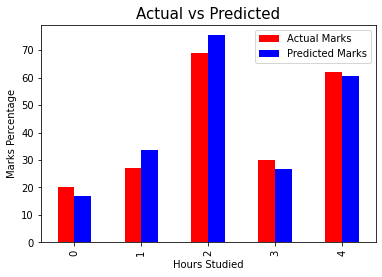

In [22]:
compare.plot(kind='bar',color=('red','blue'))
plt.title('Actual vs Predicted', size=15)
plt.ylabel('Marks Percentage',size=10)
plt.xlabel('Hours Studied',size=10)

# EVALUATING THE MODEL

#### Mean Squarred Error (MSE) is calculated by:
1. measuring the distance of the observed y-values from the predicted y-values at each value of x;
2. squaring each of these distances;
3. calculating the mean of each of the squared distances.

In [23]:
from sklearn import metrics  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.5987693072174


# SOLUTION OF THE PROBLEM STATEMENT

#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [24]:
#user input
Hours = float(input("Enter study hours:"))
Hours = [[Hours]]
print('percentage: ', reg.predict(Hours))

Enter study hours:9.25
percentage:  [93.69173249]


In [25]:
hours = 9.25
print('Number of hours of study '+str(hours))
print('Percentage Scored ',end=' ')
print(reg.predict([[hours]]))

Number of hours of study 9.25
Percentage Scored  [93.69173249]


## The predicted score of a student will be 93.69 if they studiey for 9.25 hrs/ day.